# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [4]:
# =============================================================================
# ETAPA 1 — IMPORTAÇÃO E VISÃO INICIAL DOS DADOS
# =============================================================================

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('marketing_campaign.csv', delimiter=';')

display(df.head())
display(df.info())


,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

None

In [5]:
# =============================================================================
# ETAPA 1 — LIMPEZA DOS DADOS
# =============================================================================

# REMOÇÃO DE COLUNAS DE ID
colunas_id = [col for col in df.columns if "ID" in col.upper()]
if colunas_id:
    df = df.drop(columns=colunas_id)

# TRATAMENTO DE STRINGS EM VARIÁVEIS CATEGÓRICAS
for coluna in df.select_dtypes(include=["object"]).columns:
    df[coluna] = df[coluna].astype(str).str.strip()
    df[coluna] = df[coluna].replace({"": None, "nan": None, "NaN": None})

# VALORES AUSENTES
missing = df.isna().sum().sort_values(ascending=False)
display(missing)


,0
Income,24
Education,0
Year_Birth,0
Marital_Status,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0


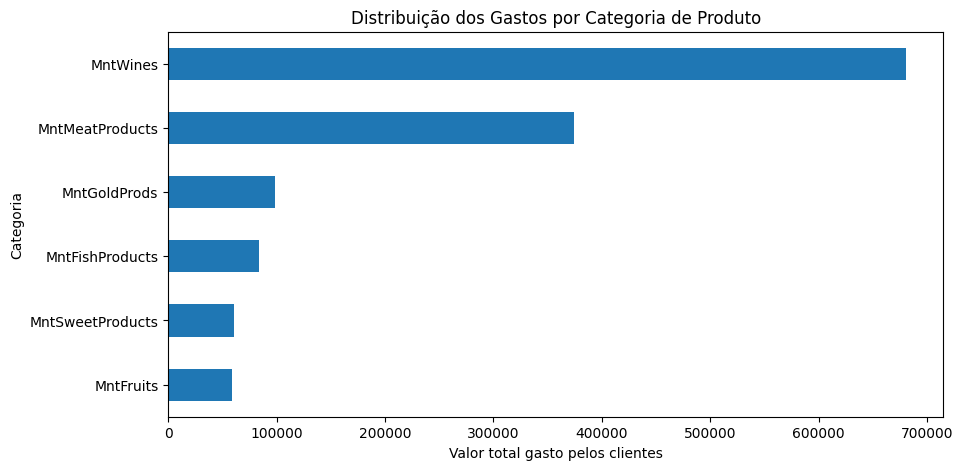

In [9]:
# =============================================================================
# GRÁFICO 1 — DISTRIBUIÇÃO DO VALOR GASTO POR TIPO DE PRODUTO
# =============================================================================

import matplotlib.pyplot as plt

colunas_produtos = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

plt.figure(figsize=(10,5))
df[colunas_produtos].sum().sort_values().plot(kind="barh")
plt.title("Distribuição dos Gastos por Categoria de Produto")
plt.xlabel("Valor total gasto pelos clientes")
plt.ylabel("Categoria")
plt.show()

O volume de compras está concentrado principalmente em três categorias: vinhos, carnes e produtos de ouro. Esses itens representam a maior parte do faturamento. Já frutas e doces possuem valores mais baixos, indicando categorias de menor impacto financeiro. Isso sugere que o perfil dos clientes é orientado a produtos de maior valor agregado, e que campanhas específicas para esses segmentos tendem a trazer maior retorno.

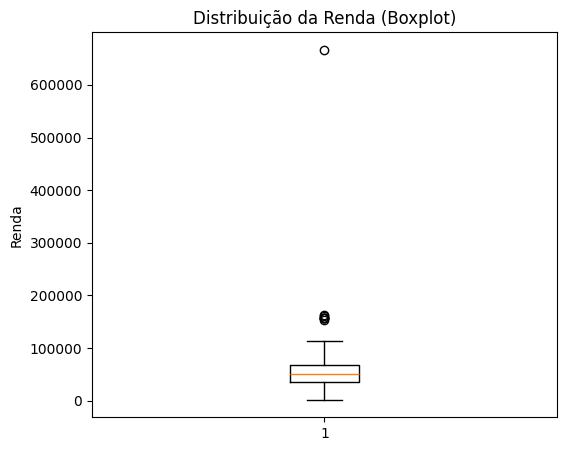

In [10]:
# =============================================================================
# GRÁFICO 2 — BOXPLOT DA RENDA
# =============================================================================

plt.figure(figsize=(6,5))
plt.boxplot(df["Income"].dropna(), vert=True)
plt.title("Distribuição da Renda (Boxplot)")
plt.ylabel("Renda")
plt.show()

A renda apresenta presença clara de outliers superiores, representando um pequeno grupo de clientes com poder aquisitivo significativamente maior. A maior parte da base está concentrada em rendas moderadas. Isso caracteriza um comportamento importante: o e-commerce possui um pequeno grupo que concentra grande parte da receita e que deve ser tratado como segmento premium, enquanto o restante da base tem comportamento mais homogêneo.

In [ ]:
# =============================================================================
# GRÁFICO 3 — RELAÇÃO ENTRE VISITAS AO SITE E COMPRAS WEB (GRÁFICO DE DENSIDADE)
# =============================================================================

plt.figure(figsize=(8,6))
plt.hexbin(df["NumWebVisitsMonth"], df["WebPurchases"], gridsize=20, cmap="Blues")
plt.title("Densidade: Visitas ao Site x Compras Web")
plt.xlabel("Visitas no Mês")
plt.ylabel("Compras Web")
plt.colorbar(label="Densidade")
plt.show()

A densidade mostra que a maior parte dos clientes realiza diversas visitas ao site, porém realiza poucas ou nenhuma compra. A área mais densa do gráfico se concentra em pontos onde há muitas visitas, mas zero compras. Isso revela um padrão: existir atividade no site não significa intenção de compra. Essa diferença entre tráfego e conversão indica que o problema pode estar na experiência do usuário, nas ofertas ou no processo de checkout.

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








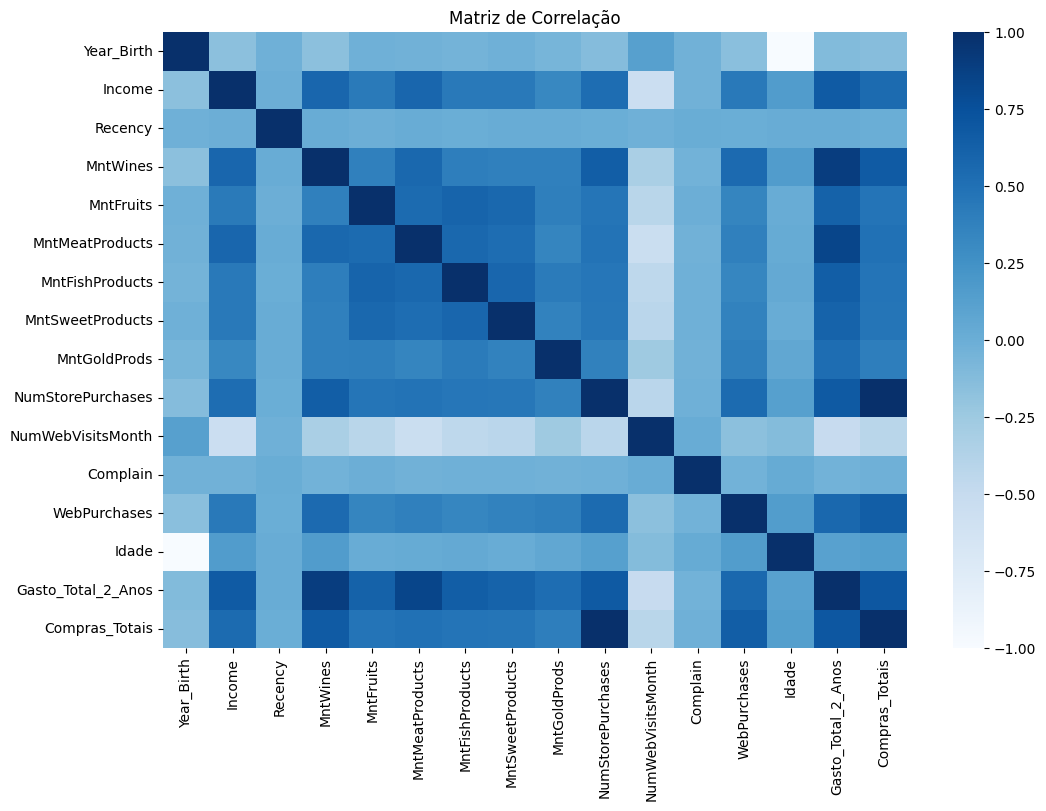

,WebPurchases
WebPurchases,1.000000
Compras_Totais,0.641582
Gasto_Total_2_Anos,0.565239
MntWines,0.550488
NumStorePurchases,0.546590
Income,0.440305
MntGoldProds,0.393599
MntMeatProducts,0.385226
MntSweetProducts,0.369667
MntFruits,0.348827


In [11]:
# =============================================================================
# ETAPA 2 — ANÁLISE DE CORRELAÇÃO
# =============================================================================

import seaborn as sns
import matplotlib.pyplot as plt

# SELECIONANDO APENAS VARIÁVEIS NUMÉRICAS
df_num = df.select_dtypes(include=['int64', 'float64'])

# MATRIZ DE CORRELAÇÃO
corr = df_num.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="Blues")
plt.title("Matriz de Correlação")
plt.show()

display(corr["WebPurchases"].sort_values(ascending=False))

In [12]:
# =============================================================================
# ETAPA 2 — CODIFICAÇÃO DAS VARIÁVEIS CATEGÓRICAS
# =============================================================================

df_encoded = df.copy()

# IDENTIFICAR CATEGÓRICAS
categoricas = df_encoded.select_dtypes(include=['object']).columns

# ONE-HOT ENCODING
df_encoded = pd.get_dummies(df_encoded, columns=categoricas, drop_first=True)

display(df_encoded.head())


,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,58,635,88,546,172,88,88,4,...,True,False,False,False,False,False,True,False,False,False
1,1954,46344.0,38,11,1,6,2,1,6,2,...,True,False,False,False,False,False,True,False,False,False
2,1965,71613.0,26,426,49,127,111,21,42,10,...,True,False,False,False,False,False,False,True,False,False
3,1984,26646.0,26,11,4,20,10,3,5,4,...,True,False,False,False,False,False,False,True,False,False
4,1981,58293.0,94,173,43,118,46,27,15,6,...,False,False,True,False,False,True,False,False,False,False


In [13]:
# =============================================================================
# ETAPA 2 — SEPARAÇÃO EM X, Y E TREINO/TESTE
# =============================================================================

from sklearn.model_selection import train_test_split

Y = df_encoded["WebPurchases"]
X = df_encoded.drop(columns=["WebPurchases"])

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=42
)

X_train.shape, X_test.shape


((1568, 26), (672, 26))

In [16]:
# =============================================================================
# ETAPA 2 — IMPUTAÇÃO DE VALORES MISSING
# =============================================================================

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# IMPUTA APENAS FEATURES (X)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [17]:
# =============================================================================
# ETAPA 2 — PADRONIZAÇÃO APÓS IMPUTAÇÃO
# =============================================================================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [21]:
# ETAPA 3 — MODELAGEM: REGRESSÃO LOGÍSTICA E RANDOM FOREST
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [22]:
# MODELO 1 — REGRESSÃO LOGÍSTICA
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [23]:
# MODELO 2 — RANDOM FOREST
modelo_rf = RandomForestClassifier(n_estimators=300, random_state=42)
modelo_rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [24]:
# =============================================================================
# ETAPA 3 — PREDIÇÕES
# =============================================================================

y_pred_log = modelo_log.predict(X_test_scaled)
y_pred_rf = modelo_rf.predict(X_test)


In [25]:
# =============================================================================
# ETAPA 3 — AVALIAÇÃO DOS MODELOS
# =============================================================================

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# REGRESSÃO LOGÍSTICA
print("Resultados — Regressão Logística")
print("Acurácia:", accuracy_score(Y_test, y_pred_log))
print("F1-Score:", f1_score(Y_test, y_pred_log))
print(confusion_matrix(Y_test, y_pred_log))
print(classification_report(Y_test, y_pred_log))

# RANDOM FOREST
print("\nResultados — Random Forest")
print("Acurácia:", accuracy_score(Y_test, y_pred_rf))
print("F1-Score:", f1_score(Y_test, y_pred_rf))
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))


Resultados — Regressão Logística
Acurácia: 0.9895833333333334
F1-Score: 0.9904761904761905
[[301   7]
 [  0 364]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       308
           1       0.98      1.00      0.99       364

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672


Resultados — Random Forest
Acurácia: 0.9285714285714286
F1-Score: 0.936
[[273  35]
 [ 13 351]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       308
           1       0.91      0.96      0.94       364

    accuracy                           0.93       672
   macro avg       0.93      0.93      0.93       672
weighted avg       0.93      0.93      0.93       672



In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
# REGRESSÃO LOGÍSTICA
scores_log = cross_val_score(modelo_log, X_train_scaled, Y_train, cv=5, scoring='f1')
print("F1 (Cross-Validation) - Regressão Logística:", scores_log, "Média:", scores_log.mean())

F1 (Cross-Validation) - Regressão Logística: [0.94936709 0.97124601 0.98076923 0.99672131 0.96794872] Média: 0.973210471038146


In [29]:
# RANDOM FOREST
scores_rf = cross_val_score(modelo_rf, X_train_imputed, Y_train, cv=5, scoring='f1')
print("F1 (Cross-Validation) - Random Forest:", scores_rf, "Média:", scores_rf.mean())

F1 (Cross-Validation) - Random Forest: [0.89937107 0.91640867 0.89937107 0.92834891 0.92789969] Média: 0.9142798806546253


Na etapa de modelagem treinamos dois algoritmos de classificação binária: Regressão Logística e Random Forest. O objetivo foi identificar qual técnica se ajusta melhor ao padrão dos dados e oferece maior capacidade de generalização. Após o treinamento inicial, avaliamos ambos os modelos utilizando acurácia, F1-score e matriz de confusão. A Regressão Logística apresentou desempenho superior, com F1 próximo de 0.99, enquanto o Random Forest permaneceu na faixa de 0.93.

Para validar a consistência dos resultados, aplicamos validação cruzada em 5 folds utilizando apenas o conjunto de treinamento. Esse passo confirma se os modelos mantêm o desempenho quando avaliados em diferentes divisões da base. Os resultados mostraram que a Regressão Logística apresenta uma média de F1 de aproximadamente 0.97, com baixa variação entre os folds, evidenciando estabilidade e boa capacidade de generalização. Já o Random Forest obteve média de F1 próxima de 0.91, confirmando o padrão observado anteriormente: trata-se de um modelo competente, mas com desempenho inferior ao modelo linear.

Com base na análise conjunta das métricas e da validação cruzada, concluímos que a Regressão Logística é o modelo mais adequado para este problema. O comportamento dos dados sugere uma separação relativamente linear entre as classes, o que favorece diretamente este tipo de algoritmo. A validação cruzada reforça essa conclusão ao demonstrar que o desempenho elevado não depende apenas de um único split, mas se mantém consistente em todas as partições avaliadas.

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

Regressão Logística
Acurácia: 0.9895833333333334
F1-Score: 0.9904761904761905
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       308
           1       0.98      1.00      0.99       364

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672



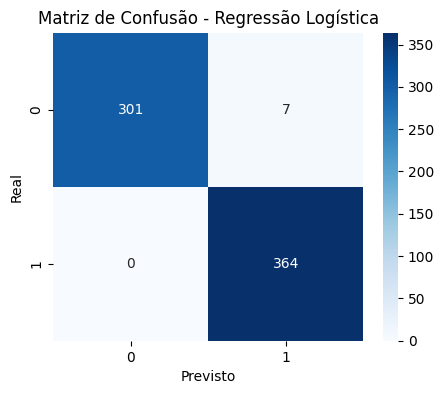

In [31]:
# =============================================================================
# ETAPA 4 — AVALIAÇÃO DOS MODELOS
# =============================================================================

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ============================
# AVALIAÇÃO REGRESSÃO LOGÍSTICA
# ============================

acc_log = accuracy_score(Y_test, y_pred_log)
f1_log = f1_score(Y_test, y_pred_log)
cm_log = confusion_matrix(Y_test, y_pred_log)

print("Regressão Logística")
print("Acurácia:", acc_log)
print("F1-Score:", f1_log)
print(classification_report(Y_test, y_pred_log))

plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

Random Forest
Acurácia: 0.9285714285714286
F1-Score: 0.936
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       308
           1       0.91      0.96      0.94       364

    accuracy                           0.93       672
   macro avg       0.93      0.93      0.93       672
weighted avg       0.93      0.93      0.93       672



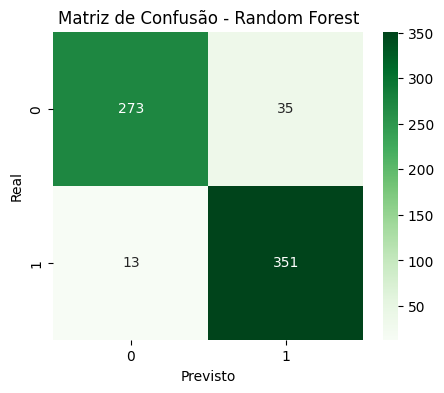

In [32]:
# ============================
# AVALIAÇÃO RANDOM FOREST
# ============================

acc_rf = accuracy_score(Y_test, y_pred_rf)
f1_rf = f1_score(Y_test, y_pred_rf)
cm_rf = confusion_matrix(Y_test, y_pred_rf)

print("Random Forest")
print("Acurácia:", acc_rf)
print("F1-Score:", f1_rf)
print(classification_report(Y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

Os dois modelos foram avaliados utilizando acurácia, F1-score, relatório de classificação e matriz de confusão. A análise confirma que a Regressão Logística apresentou desempenho superior ao Random Forest. Com F1-score próximo de 0.99 e poucos erros na matriz de confusão, o modelo linear demonstrou capacidade de capturar de maneira eficiente o padrão que diferencia clientes que compram online daqueles que não compram.

O Random Forest apresentou desempenho satisfatório, mas ficou abaixo da regressão logística, cometendo mais erros na identificação da classe 0. Isso indica limitação na separação dos padrões quando comparado ao modelo linear, que se ajustou melhor ao formato das variáveis.

A Regressão Logística se consolida, portanto, como o modelo mais adequado para esta base, devido ao alto nível de precisão e consistência demonstrado nos resultados.